In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import os
sys.path.append("..")

In [13]:
project_id = "anan-project"
nqubit = 7

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/toshifumi.anan/uzabase/work/anan-project-bq-import-sa.json"

In [14]:
from common.utils.job_result import get_result_from_bq, summary_job_result_by_time
jobs = get_result_from_bq(project_id, f"nqubit = {nqubit}")
summaries = summary_job_result_by_time(jobs)

In [16]:
print(summaries)

[{'nqubit': 7, 'gate_type': 'direct', 'depth': 1, 't_type': None, 'min_time': None, 'max_time': None, 'noise_singlequbit_value': 'None', 'noise_twoqubit_value': 'None', 'constraints': 'false', 'bounds': 'false', 't_evol': None, 'cost': {'min': -8.288018893530698, 'max': -8.277717745202986, 'mean': -8.28286401128895, 'std': 0.005145849622126861}, 'iter': {'min': 903.0, 'max': 1901.0, 'mean': 1163.3, 'std': 327.11895389903657}}, {'nqubit': 7, 'gate_type': 'direct', 'depth': 2, 't_type': None, 'min_time': None, 'max_time': None, 'noise_singlequbit_value': 'None', 'noise_twoqubit_value': 'None', 'constraints': 'false', 'bounds': 'false', 't_evol': None, 'cost': {'min': -8.337577710048599, 'max': -8.33329176875915, 'mean': -8.334257121430092, 'std': 0.001163100711667012}, 'iter': {'min': 2341.0, 'max': 13101.0, 'mean': 5530.0, 'std': 2914.4426568385247}}, {'nqubit': 7, 'gate_type': 'direct', 'depth': 3, 't_type': None, 'min_time': None, 'max_time': None, 'noise_singlequbit_value': 'None', '

In [17]:
## x axis: layer, y axis: expectation value
plot_list = {}
for summary in summaries:
    if summary['t_type'] == 'random':
        if ("%s-%s-%s-%s-%s-%s-%s-%s-depth" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])) not in plot_list.keys():
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-depth" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['depth']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-cost-min" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['cost']['min']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-cost-mean" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['cost']['mean']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-cost-std" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['cost']['std']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-iter-min" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['iter']['min']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-iter-max" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['iter']['max']]
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-iter-mean" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])] = [summary['iter']['mean']]
        else:
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-depth" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['depth'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-cost-min" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['cost']['min'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-cost-mean" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['cost']['mean'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-cost-std" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['cost']['std'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-iter-min" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['iter']['min'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-iter-max" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['iter']['max'])
            plot_list["%s-%s-%s-%s-%s-%s-%s-%s-iter-mean" % (summary['gate_type'], summary['min_time'], summary['max_time'], summary['noise_singlequbit_value'], summary['noise_twoqubit_value'], summary['constraints'], summary['bounds'], summary['t_evol'])].append(summary['iter']['mean'])

def create_expectation_graph(title, y_min=-9.0, y_max=-5.0):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("expectation value")
    plt.ylim(y_min, y_max)

def create_iteration_graph(title):
    plt.figure(figsize=(12,8))
    plt.rcParams["font.size"] = 14
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['figure.figsize'] = (3.5, 3.5)
    plt.rcParams['font.family']= 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    if title is not None:
        plt.title(title)
    plt.xlabel("layer")
    plt.ylabel("iteration")

In [18]:
plot_list['indirect_xy--1-1-None-None-false-false-"absolute"-cost-std']

[0.34189478272177753,
 0.29225587000767084,
 0.18345942089511955,
 0.07574708643710135]

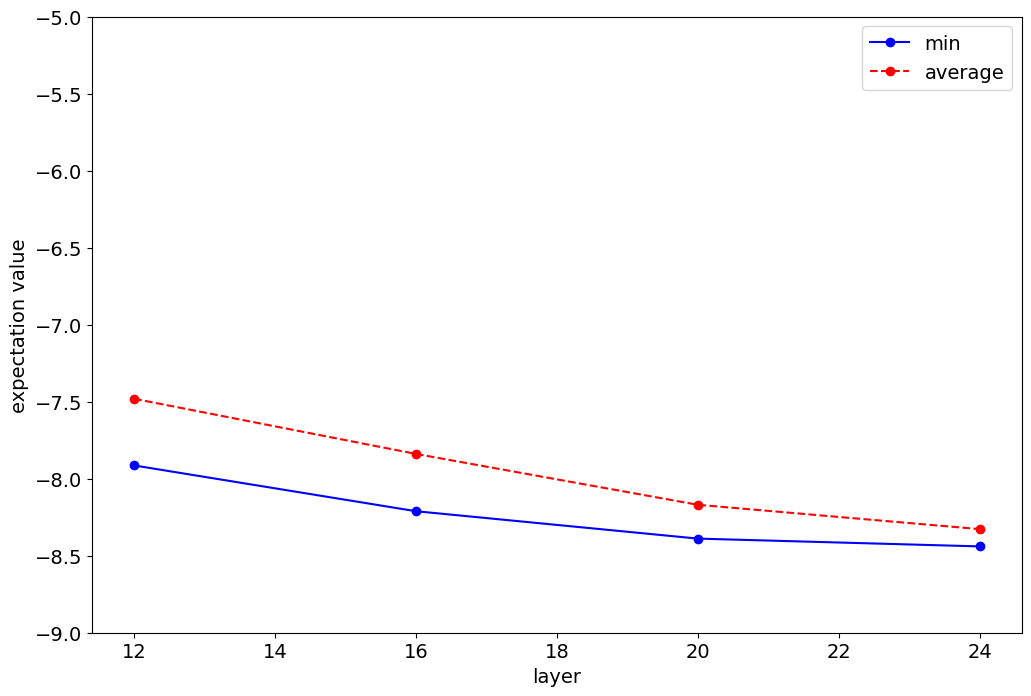

In [10]:
# compare to direct

create_expectation_graph("")
# plt.hlines(exact_value, min(d_plot_list['depth']), max(d_plot_list['depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_xy--1-1-None-None-false-false-"absolute"-depth'], plot_list['indirect_xy--1-1-None-None-false-false-"absolute"-cost-min'], marker='o', color='blue', label='min')
plt.plot(plot_list['indirect_xy--1-1-None-None-false-false-"absolute"-depth'], plot_list['indirect_xy--1-1-None-None-false-false-"absolute"-cost-mean'], marker='o', color='red', linestyle="dashed", label='average')
plt.legend()
plt.savefig('./images/indirect_xy_unbounds_expectation_t_absolute.png')

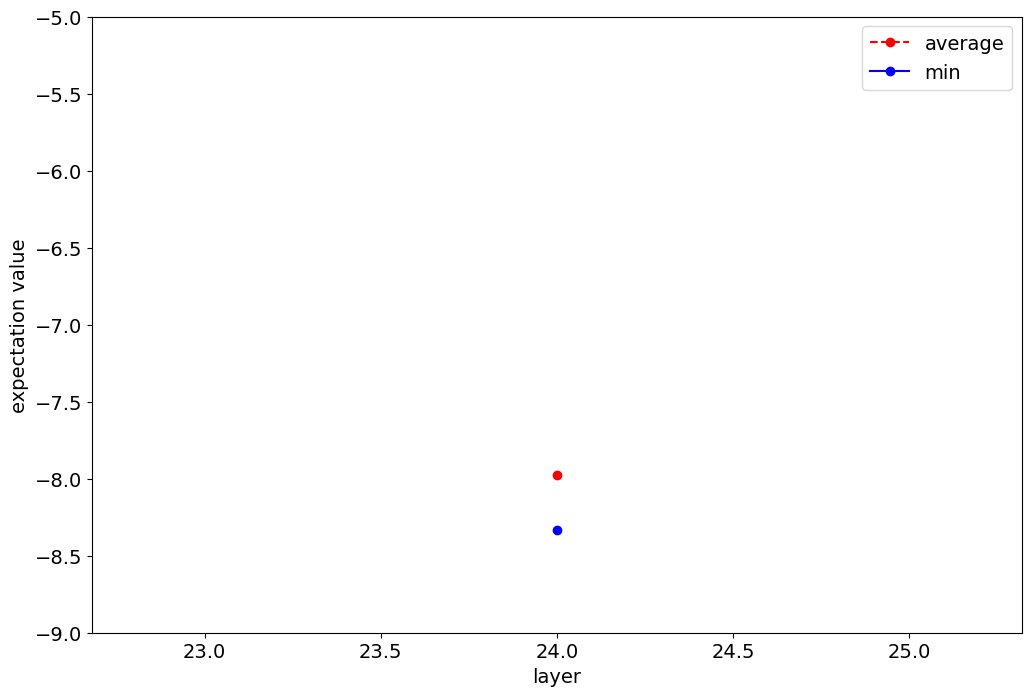

In [10]:
# with bounds
create_expectation_graph("")
# plt.hlines(exact_value, min(d_plot_list['depth']), max(d_plot_list['depth']), colors='black', linestyles='dashed', label='exact value')
plt.plot(plot_list['indirect_xy-0-10-None-None-false-true-absolute-depth'], plot_list['indirect_xy-0-10-None-None-false-true-absolute-cost-mean'], marker='o', color='red', linestyle="dashed", label='average')
plt.plot(plot_list['indirect_xy-0-10-None-None-false-true-absolute-depth'], plot_list['indirect_xy-0-10-None-None-false-true-absolute-cost-min'], marker='o', color='blue', label='min')

plt.legend()
plt.savefig('./images/indirect_xy_bounds_expectation_reverse_time.png')